In [14]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt

Load .npy images from a given directory

In [15]:
def load_img(img_dir, img_list):
    images = []
    for fname in img_list:
        if fname.endswith('.npy'):
            path = os.path.join(img_dir, fname)
            image = np.load(path)
            images.append(image)
    return np.array(images)


Custom data generator that yields batches of images and masks

In [ ]:
def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)

    #keras needs the generator infinite, so we will use while true  
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X,Y)      

            batch_start += batch_size   
            batch_end += batch_size

Now we will use the paths of our directories and then load the lists of filenames

In [ ]:
train_img_dir = r"C:\Users\arnav\Downloads\brain\BraTS2020_TrainingData\input_data_128\train\images"
train_mask_dir = r"C:\Users\arnav\Downloads\brain\BraTS2020_TrainingData\input_data_128\train\masks"

train_img_list = [f for f in os.listdir(train_img_dir) if f.endswith('.npy')]
train_mask_list = [f for f in os.listdir(train_mask_dir) if f.endswith('.npy')]

batch_size = 2

Get one batch and visualize

In [ ]:
train_img_datagen = imageLoader(train_img_dir, train_img_list, train_mask_dir, train_mask_list, batch_size)

img, msk = next(train_img_datagen)

img_num = random.randint(0, img.shape[0] - 1)
test_img = img[img_num]
test_mask = msk[img_num]
test_mask = np.argmax(test_mask, axis=3)

n_slice = random.randint(0, test_mask.shape[2] - 1)

Let us plot the image now

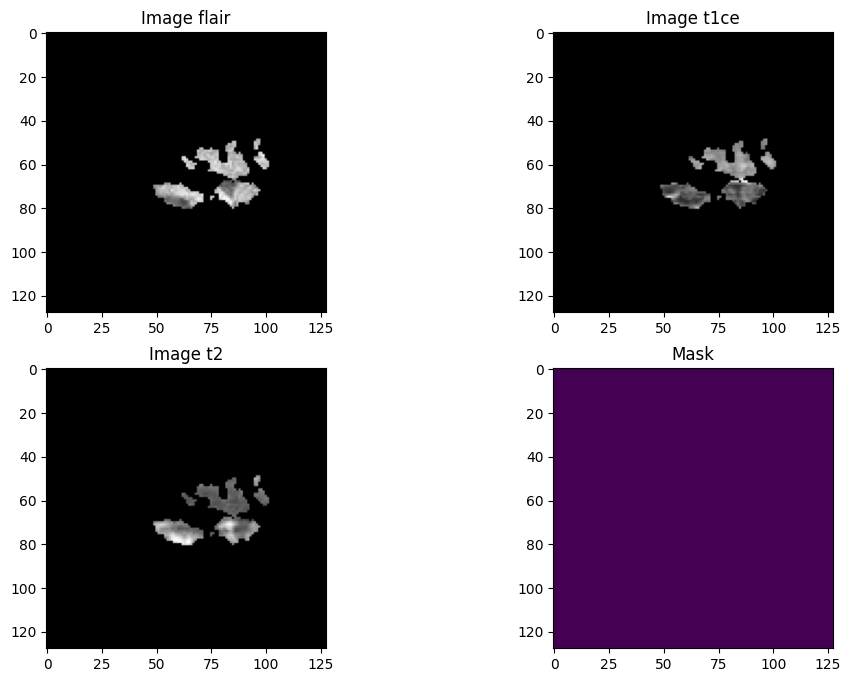

In [11]:
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()